## Этап 1. Знакомство с данными

### 1.1 Импортирование библиотек

Импортируем необходимые библиотеки для нашей работы:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format

### 1.2 Чтение файла и знакомство с данными

Прочитаем нужный датасет и сохраним его в переменную games.

In [2]:
games = pd.read_csv('/datasets/games.csv')

Посмотрим на 15 случайных строк нашего датасета с сохранением порядка строк: 

In [3]:
games.sample(15,random_state = 1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,"2,007.00",Misc,0.00,0.00,0.03,0.00,nan,NaN,NaN
14043,Nobunaga's Ambition II,3DS,"2,015.00",Strategy,0.00,0.00,0.04,0.00,nan,NaN,NaN
3158,Up,DS,"2,009.00",Action,0.30,0.27,0.00,0.07,nan,tbd,E
22,Super Mario Bros. 3,NES,"1,988.00",Platform,9.54,3.44,3.84,0.46,nan,NaN,NaN
110,Mario Kart 8,WiiU,"2,014.00",Racing,3.15,2.15,1.28,0.51,88.00,9.1,E
1988,ATV: Quad Power Racing,PS,"2,000.00",Racing,0.58,0.39,0.00,0.07,42.00,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,"1,997.00",Misc,0.00,0.00,0.22,0.00,nan,NaN,NaN
8849,Derby Stallion 64,N64,"2,001.00",Sports,0.00,0.00,0.15,0.00,nan,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,"2,010.00",Action,0.03,0.00,0.00,0.00,59.00,5.8,T
106,Tekken 3,PS,"1,998.00",Fighting,3.27,2.22,1.40,0.29,96.00,9.1,T


В нашем датасете встречаются такие столбцы как:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Первое, что попадается в глаза, это отсутвующие значения в столбцах, обратим внимание также на встречающиеся nan и tbd. Год выпуска указан в числах с плавающей запятой, в дальнейшем изменим тип данных, причем использовать тип datetime64 не обязательно, так как указан лишь год, можно будет изменить тип данных и на целочисленные значения. Для удобства работы с данными, переименуем также в дальнейшем столбцы и строки с учетом нижнего регистра.

Вызовем общую информацию по нашей таблице.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В нашей таблице 16715 строк и 11 столбцов. Опять же подчеркнем что дата выпуска представлена, как float64, а оценка пользователей как object, вероятно из-за встречающегося tbd. Встречаются большие пропуски в данных. Посмотрим более подробно на них.

Создадим функцию для определения пропущенных значений в количественном и процентном значении.

In [5]:
def count_percent_isnull(df): # функция для поиска количества и процентов , пропущенных значений.
    df_count = df.isnull().sum() # поиск количества
    df_percent = df.isnull().sum() / df.shape[0] * 100  # поиск процентов пропущенных значений
    df_finish = pd.DataFrame([df_count,df_percent], index = ['count','percent']) # Датафрейм новый для вывода
    return df_finish.T.sort_values('count') # возвращаем, сортируемый вывод.

Вызовем только что созданную функцию.

In [6]:
count_percent_isnull(games)

,count,percent
Platform,0.00,0.00
NA_sales,0.00,0.00
EU_sales,0.00,0.00
JP_sales,0.00,0.00
Other_sales,0.00,0.00
Name,2.00,0.01
Genre,2.00,0.01
Year_of_Release,269.00,1.61
User_Score,"6,701.00",40.09
Rating,"6,766.00",40.48


Обратим внимание на большое количество пропущенных строк в оценках, как пользователей, так и критиков, а также в рейтинге организации ESRB. Можно предположить, что данные значения отсутствуют по причине раннего выпуска игр, когда такие данные просто не учитывались, в дальнейшем необходимо изменить данные пропуски на определенные значения. Также заметим пропуски в Name, Genre, Year_of_Release, их немного в дальнейшем избавимся от них.

Проверим встречаются ли явные дубликаты:

In [7]:
games.duplicated().sum()

0

Явных дубликатов не выявлено.

Проверим столбец платформы игр на уникальные значения.

In [8]:
games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов нет.

Проверим теперь столбец жанр.

In [9]:
games.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Также все в порядке.

Проверим столбец Рейтинг.

In [10]:
games.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

Посмотрим полее подробно на категории:
* E - от 6 лет.
* M - от 17 лет.
* T - от 13 лет.
* E10+ - от 10 лет.
* K-A - от 6 лет. Теперь данная категория заменена на E
* AO - от 18 лет.
* EC - для детей от 3 лет.
* RP - Рейтинг ожидается.

Так как K-A теперь заменена на Е, в дальнейшем объединим все в Е.

Также посмоторим минимальные и максимальные значения наших столбцов, проверим на аномальность.

In [11]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Ничего аномального не наблюдаем, все значения в пределах разумного. 

### 1.3 Вывод 

Познакомившись подробнее с нашим датасетом было выявлено, что каждая строка включает в себя данные об игре. Всего 16715 строк и 11 столбцов. Встречается большое количество пропущенных значения в строках, где отсутствуют данные в столбцах Critic_Score, User_Score, Rating. Это связано с тем, что не все игры были своевременно зафиксированы для оценок и рейтингов. ESRP была основана в 1994 году. В данных пропущенных значениях было решено поменять отсутсвующие значения на определенные значения,которые подберем в дальнейшем. Что касаемо столбцов Name, Rating, Genre, то эти пропущенные значения было решено удалить, так как их ни так много. Столбец с годом релиза изменим в дальнейшем на int,столбец с оценкой пользователей представлен как object из-за встречающихся tbd, которые в дальнейшем заменим. Также отметим то, что для удобства работы переимениуем столбцы на нижний регистр букв. 

## Этап 2. Предобработка данных

### 2.1 Замена названия столбцов

Ранее было решено привести названия столбцов к нижнему регистру для удобства в работе, сделаем это:

In [12]:
games.columns = games.columns.str.lower()

Проверим  наши столбцы:

In [13]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Привели столбцы к нижнему регистру.

### 2.2 Нижний регистр для строк

Также для удобства данных изменим строки и подведем их нижнему регистру.

In [14]:
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()

Посмотрим на резульат.

In [15]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8,e
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.3,e
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,e
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,"2,016.00",action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,lma manager 2007,x360,"2,006.00",sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,haitaka no psychedelica,psv,"2,016.00",adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,spirits & spells,gba,"2,003.00",platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


Так с таблицей будет гораздо удобнее работать в дальнейшем. 

### 2.3 Обработка пропущенных значений

От пропущенных строк в name, genre, year_of_release избавимся, так как их мало, да и с увернностью восстановить не получится. Касаемо года выпуска, очень часто на разных платформах год выпуска отличается и восстановить их по названию игр для других платформ, исходя из этой логики, нет возможности.

In [16]:
games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

Касаемо critic_score нет возможности восстановить данные строки, поэтому заменим пропущенные значения на -1.

In [17]:
games['critic_score'] = games['critic_score'].fillna(-1)

Аналогичную процедуру произведем и с user_score, также здесь присутствуют значения tbd, это значения для игр, где еще не выставлена оценка, а только ожидается. Также промаркируем эти строки значениями -1. 

In [18]:
games['user_score'] = games['user_score'].fillna(-1)
games['user_score'] = games['user_score'].replace('tbd', -1)

Касаемо столбца rating необходимо заменить значения, которые уже не используются на современные,то есть с "k-a" на "e". Также изменим пропущенные значения на unknown, то есть неизвестные.

In [19]:
games['rating'] = games['rating'].replace('k-a', 'e')
games['rating'] = games['rating'].fillna('unknown')

Посмотрим теперь на общую информацию по таблице.

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null object
rating             16444 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Успешно заполнили все пропущенные значения. Далее нужно поменять типы данных.

### 2.4 Изменение типов данных

Как ранее заметили, столбец год выпуска представлен в виде float, это ни к чему. Так как у нас указан лишь год, а не дата целиком, то было решено поменять на тип int.

In [21]:
games['year_of_release'] = games['year_of_release'].astype('int16')

После избавления от 'tbd', user_score необходимо привести к float.

In [22]:
games['user_score'] = games['user_score'].astype('float')

Проверим изменение типов данных.

In [23]:
games.dtypes

name                object
platform            object
year_of_release      int16
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Типы данных испешно заменены.

Проверим еще раз на явные дубликаты, после всех манипуляций.

In [24]:
games.duplicated().sum()

0

Дубликатов нет. Можно идти дальше.

### 2.5 Суммарная продажа во всех регионах

Создадим столбец all_sales и отобразим в нем суммарные продажи по всем регионам. 

In [25]:
games['all_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

In [26]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.00,-1.00,unknown,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.00,-1.00,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,unknown,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.00,-1.00,unknown,0.01


Успешно создали столбец с суммарными продажами для дальнейшей работы.

### 2.6 Вывод

В ходе данной работы было сделано следующее:
* Был изменен регистр столбцов на нижний для удобства в дальнейшей работы.
* Был изменен регистр строк на нижний для name, platform, genre, rating для удобства в работе.
* Были удалены пропущеные значения в name, genre, year_of_release, так как таких значений немного и нет возможности их восстановить с большей вероятностью.
* Были заменены пропущенные значения на -1 в critic_score, user_score, для маркировки.
* Значения tbd в user_score заменили на -1, так как эти оценки ожидаются, и было решено промаркировать.
* Объединили значения с "k-a" и "e", в последнюю, по нормам современной тенденции. 
* Заменили тип данных  в year_of_release на int16, так как представлен лишь год. Также заменили тип данных в user_score на float64, так как избавились от tbd и теперь в них лишь числа с плавающей запятой.
* Создали общий столбец с суммарными продажами по всем регионам.

## Этап 3. Исследовательский анализ данных

### 3.1 Распределение выпуска игра по годам

Создадим сводную таблицу по годам выпуска игр, выраженную в количестве.

In [27]:
sales_count = games.pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'count')

In [28]:
sales_count.columns = ['count']

Посмотрим визуально на график по распределению выпуска игр по годам.

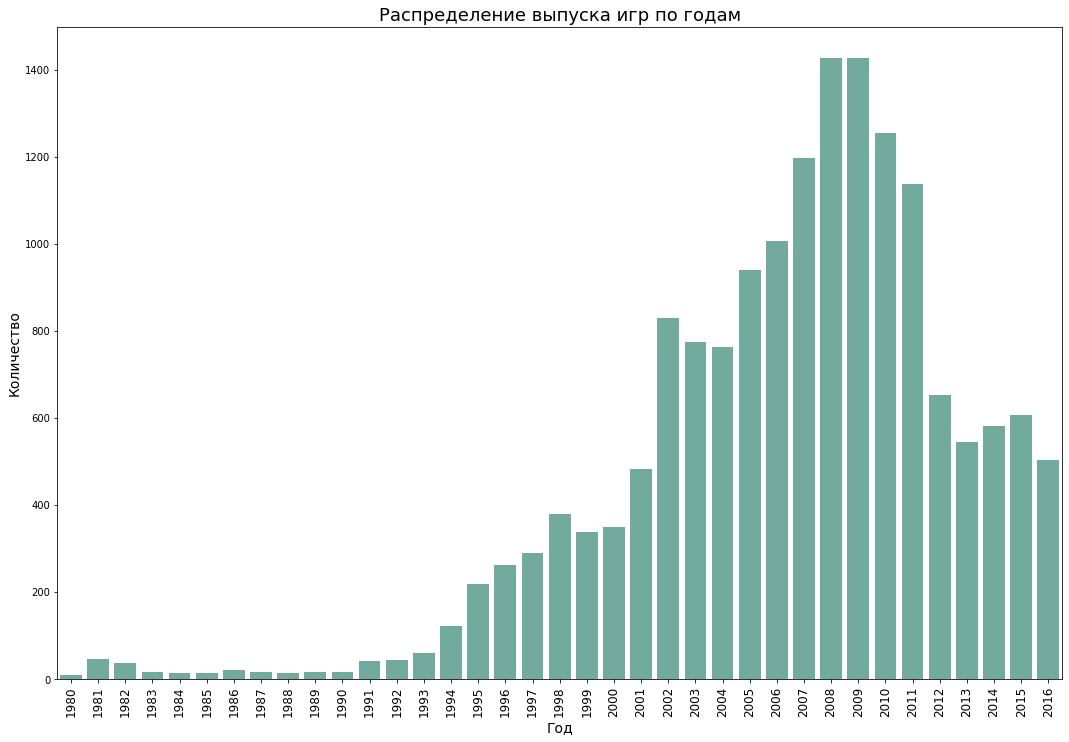

In [29]:
plt.figure(figsize=(18,12))
sns.set_color_codes("deep")
sns.barplot(x=sales_count.index, y='count', data=sales_count, color='#69b3a2')
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Распределение выпуска игр по годам', fontsize=18)
plt.xticks(rotation=90, fontsize='12')
plt.show()

Точка отсчета начинается с 1980 года, заканчивается 2016 годом, но нужно помнить, что 2016 представлен не полностью. В 1980-е годы , с появлением персональных компютеров, началась эра разработки компьютерных игр. Поначалу созданием игр занимались энтузиасты, со временем это привлекло интерес и у компаний и они начали заниматься разработкой игр на коммерческой основе. 1990-е идет бурное развитие технологий, развитие операционных систем, распространение CD дисков и вследствии уверенное распространие жанров игр. В 1995 году создают windows-95, который помогает развитию персональных компьютеров, люди интересуются играми, зарождается киберспорт. в 2000 -е начинается распространие интернета, распространяются игры по сети и интернету. 2002 год, принес игровой индустрии множество хитов. 2000-е это пик развития компьютерных игр, который достигает своих высот в 2008 и 2009 году. в 2007 году на рынок выходит iOS от компании apple, а в 2008 свою операционную систему для мобильных платформ распространяет и google, под названием android. Начиная с 2010 годов , с распространением планшетов и увеличенеим мощностей мобильных телефонов, начинается переформатирование рынка, разработчики акцентируют внимание на перспективный рынок мобильных игр, в связи с чем с 2010 года до 2012 года происходит спад, и с 2013 года, в дальнейшем рынок компьютерных игр выходит на стабильный уровень выпуска игр, после резкого спада.

### 3.2 Продажа по платформам

Создадим сводную таблицу по 10 самым популярным платформам.

In [30]:
top_platforms = games.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(by ='all_sales',ascending = False).head(10)

Посмотрим наглядно на таблицу.

In [31]:
top_platforms

,all_sales
platform,
ps2,"1,233.56"
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Также создадим круговой график с долями по 10 самым популярным платформам.

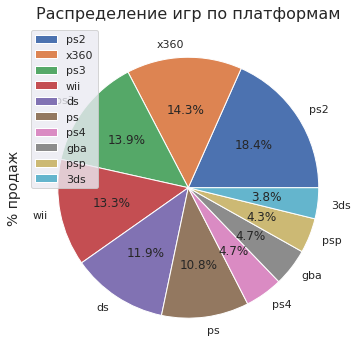

In [32]:
sns.set(style="darkgrid")
top_platforms.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по платформам', fontsize=16)
plt.show()

Самая популярная платформа за все время это ps2 от компании Sony, реализовавшая свыше 1.2 млрд копий. Следом за ней идет x360 от компании Microsoft, реализовашая 961 млн.копий, замыкает тройку - ps3 от Sony с 931 млн. копий. Последние 3 позиции в топ10 это gba(Game Boy Advance) от популярной компании Nintendo,являющаяся портативной игровой системой, реализовавшая 312 млн. копий. Предпоследняя позиция принадлежит psp от компании Sony с 289 млн. копий, которая также является портитивной игровой системой. Заканчивается топ 10 платформой 3ds от компании Nintendo c 257 млн. копий, которая также является портативной игровой системой.

Теперь посмотрим как менялись продажи по топ10 платформам со временем. 

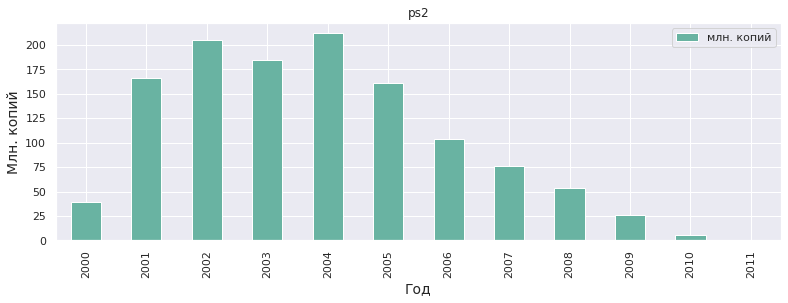

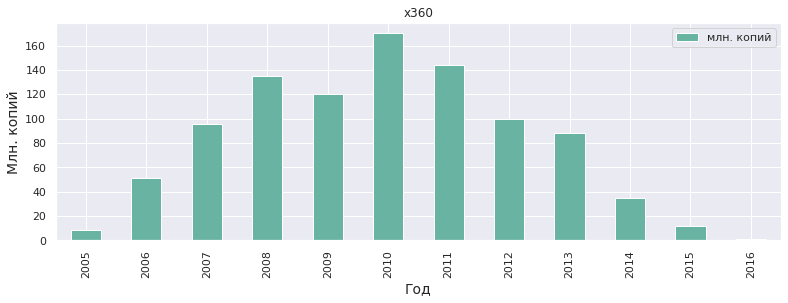

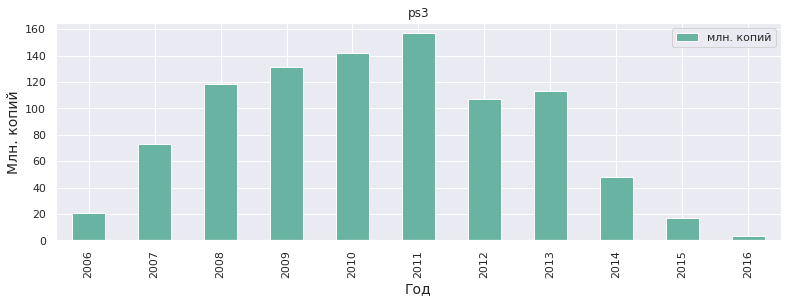

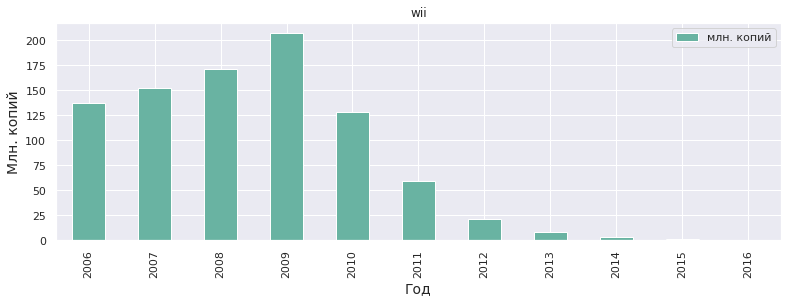

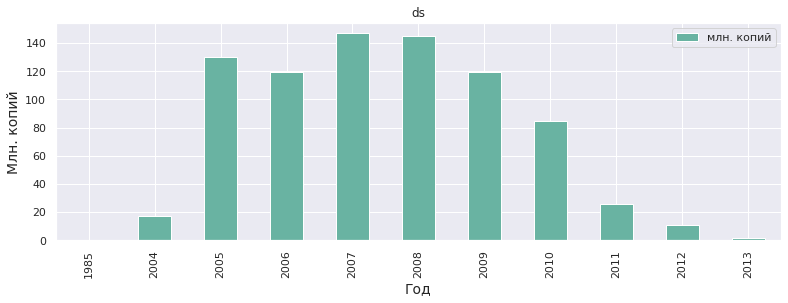

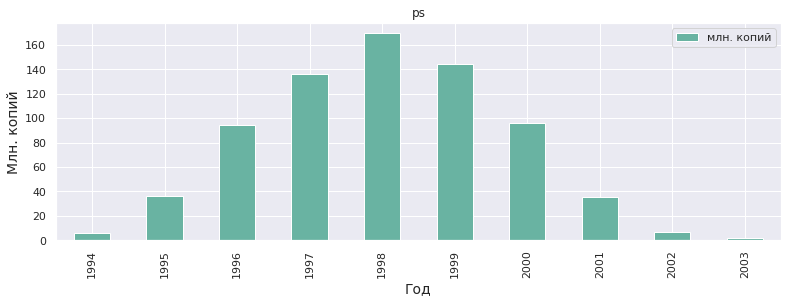

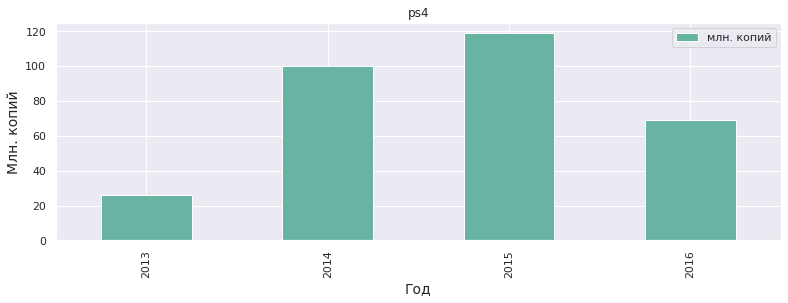

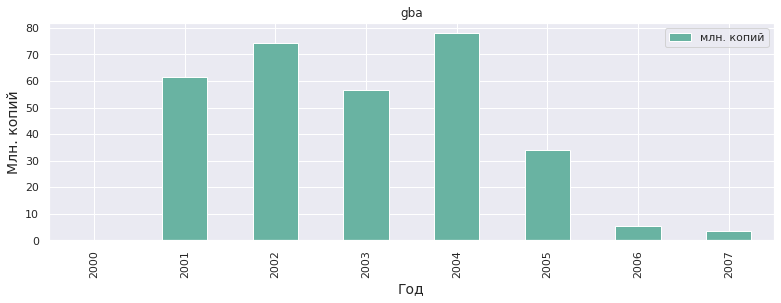

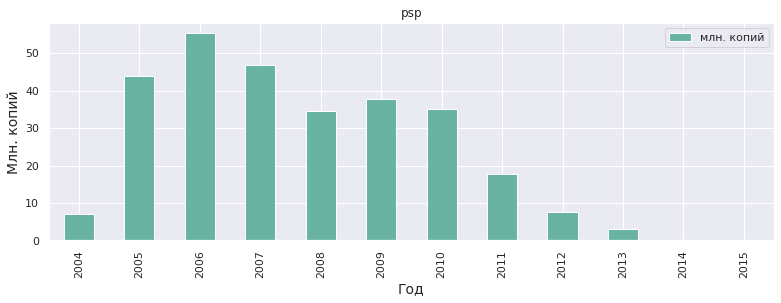

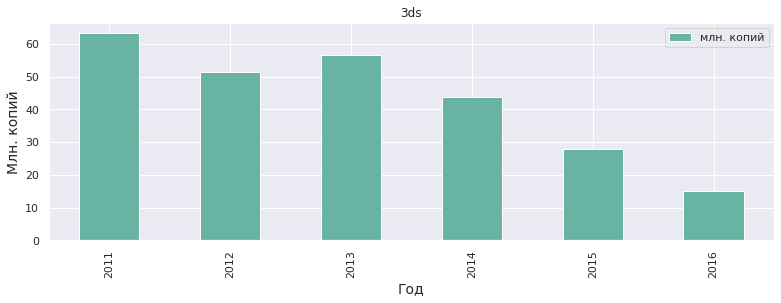

In [33]:
for platform in top_platforms.index:
    games.query('platform == @platform').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4),color='#69b3a2')
    plt.title(platform)
    plt.xlabel('Год', fontsize=14)
    plt.legend(['млн. копий'])
    plt.ylabel('Млн. копий', fontsize=14)

Здесь можно увидеть преемственность поколений игровых платформ. Напримере Sony и Nintendo, у них падение ажиотажа связано с выходом новых поколений игровых платформ. Падает реализация продаж ps, растет у ps2, падает у ps2, следовательно, растет у ps3 и так далее. Это связано с тем, что прогресс не стоит на месте, и игровые разработчики заинтересованы в качестве своего продукта, также растут запросы и  у клиентов. Новое поколение платформ, это всегда улучшение технических характеристик платформы, а это в свою очередь улучшение графики, физики, игровой механики и в целом на выходе качество конечного продукта. 

Посмотрим сколько лет живет каждая платформа, создадим вначале сводную таблицу с годом начала реализации и с последним годом реализации.

In [34]:
platform_cycle = games.groupby('platform')['year_of_release'].agg(['min','max'])

Создадим столбец с разницей между начальным годом реализации и последним годом реализации для каждой из платформ.

In [35]:
platform_cycle ['difference']= platform_cycle['max'] - platform_cycle['min']

Посмотрим на таблицу в порядке возрастания разницы между годами.

In [36]:
platform_cycle.sort_values('difference')

,min,max,difference
platform,,,
gg,1992,1992,0
pcfx,1996,1996,0
tg16,1995,1995,0
3do,1994,1995,1
scd,1993,1994,1
ws,1999,2001,2
ng,1993,1996,3
xone,2013,2016,3
ps4,2013,2016,3


Как можно заметить, встречаются такие платформы , которые не смогли занять свою нишу на рынке продажи игр и прекратили реализацию в том же году. Это такие платформы как gg, pcfx, tg16. Также встречаются такие живучие платформы как pc, которые уже 31 год как на рынке в 2016 году. Так и ds, который также 28 лет был популярен, но цикл которого закончился в 2013 году, исходя из вышерассматриваемой информации и графиков. Далее следует определить средний цикл платформы, но такие платформы, что выше обозначили будут мешать, так как в данном случае они являются выбросами. 

Для того, чтобы определить средний цикл, вначале определим значения выбросов по данному столбцу. Для этого создадим функцию, для определениях нижней и верхней границы нормальных значений.

In [37]:
def whiskers(df,column): # функция для опеределения "усов"
    stat = df[column].describe() # сохраним в переменную основные стат.показатели
    
    iqr = stat[6] - stat[4] # межквартирльный размах
    
    l_whisker = stat[4] - 1.5 * iqr # левый "ус" 
    r_whisker = stat[6] + 1.5 * iqr # правый "ус" 

    if l_whisker < stat[3]: l_whisker = stat[3]  # левый "ус" не меньше минимального значения
        
    if r_whisker > stat[7]: r_whisker = stat[7] # правый "ус" не больше максимального значения
        
    return [l_whisker, r_whisker]

In [38]:
whiskers(platform_cycle,'difference')

[0.0, 20.5]

Теперь посмотрим на среднюю и медиану без выбросов и определим средний цикл платформы. 

In [39]:
platform_cycle.query('0<=difference<=20.5').describe()[['difference']]

,difference
count,29.00
mean,6.10
std,3.97
min,0.00
25%,3.00
50%,6.00
75%,10.00
max,13.00


Округлив значения средней и медианы, получим, что средняя продолжительность жизни платформы составляет 6 лет.

Теперь посмотрим сколько лет продолжительности выпуска игр составляет топ10 платформ.

In [40]:
platform_cycle.query('platform in @top_platforms.index').describe()[['difference']]

,difference
count,10.00
mean,10.50
std,6.74
min,3.00
25%,7.50
50%,10.00
75%,11.00
max,28.00


Жизненный цикл для самых популярных платформ отличается, средний цикл выпуска для топ10 составляет 10,5 лет. Это же можно было увидеть визуально и на графиках. Это можно объяснить тем, что платформа завоевала признание, для таких платформ создаются эксклюзивные игры, у них больше фанбаза, дольше поддержка игровой платформы, и вследствии этого популярность платформы сохраняется гораздо дольше, как правило до следующей версии новой игровой платформы.

Также отметим отдельно pc, который в 2016 году, имеет наибольшую продолжительность в годах по выпуску игр. Отсутствие большего количества продаж можно списать на то, что на pc некоторые пользователи злоупотребляют "пиратским" доступом к играм, избегая покупки у официальных ритейлеров, поэтому производители игр не могут полноценно доверять данной платформе. Зачастую одну и ту же игру на pc портируют спустя долгое время, после релиза на других платформах. Логика таких действий ясна и оправдана, чтобы клиенты покупали лицензионные копии игр и чтоб избежать возможности поиграть в пиратские версии, которыми грешат pc.

### 3.3 Актуальный период

Рынок компьютерных игр это динамичный, быстроменяющийся рынок, разработчикам всегда нужно быть в тренде, определять потребности игроков, учитывать время разработки игры, знать вектор , определиться с жанром, платформами. Поэтому было решено, что актуальным периодом будет являться срок в 5 лет, но при этом учитывать лишь платформы, которые актуальны и  имеют продажи игр в 2016 году. 

Для этого создадим вначале переменюю last_year с последним годом.

In [41]:
last_year = games.query('year_of_release ==2016')

Теперь в переменную actual сохраним данные с 2012 года и с платформами из 2016 года.

In [42]:
actual = games.query('year_of_release >=2012 and platform in @last_year.platform ')

#### 3.3.1 Распределение выпуска игр по годам для актуальных платформ

Создадим теперь сводную таблицу с мультииндексом, по годам и платформам. 

In [43]:
actual.pivot = actual.pivot_table(index = ['year_of_release', 'platform'], values = 'all_sales', aggfunc = 'sum')

Посмотрим на нее.

In [44]:
actual.pivot

all_sales
year_of_release platform           
2012            3ds           51.36
                pc            23.22
                ps3          107.36
                psv           16.19
                wii           21.71
                wiiu          17.56
                x360          99.74
2013            3ds           56.57
                pc            12.38
                ps3          113.25
                ps4           25.99
                psv           10.59
                wii            8.59
                wiiu          21.65
                x360          88.58
                xone          18.96
2014            3ds           43.76
                pc            13.28
                ps3           47.76
                ps4          100.00
                psv           11.90
                wii            3.75
                wiiu          22.03
                x360          34.74
                xone          54.07
2015            3ds           27.78
                pc             8.52
                ps3           16.82
                ps4          118.90
                psv            6.25
                wii            1.14
                wiiu          16.35
                x360          11.96
                xone          60.14
2016            3ds           15.14
                pc             5.25
                ps3            3.60
                ps4           69.25
                psv            4.25
                wii            0.18
                wiiu           4.60
                x360           1.52
                xone          26.15

Посмотрим визуально как распределялись платформы по нашей выборке.

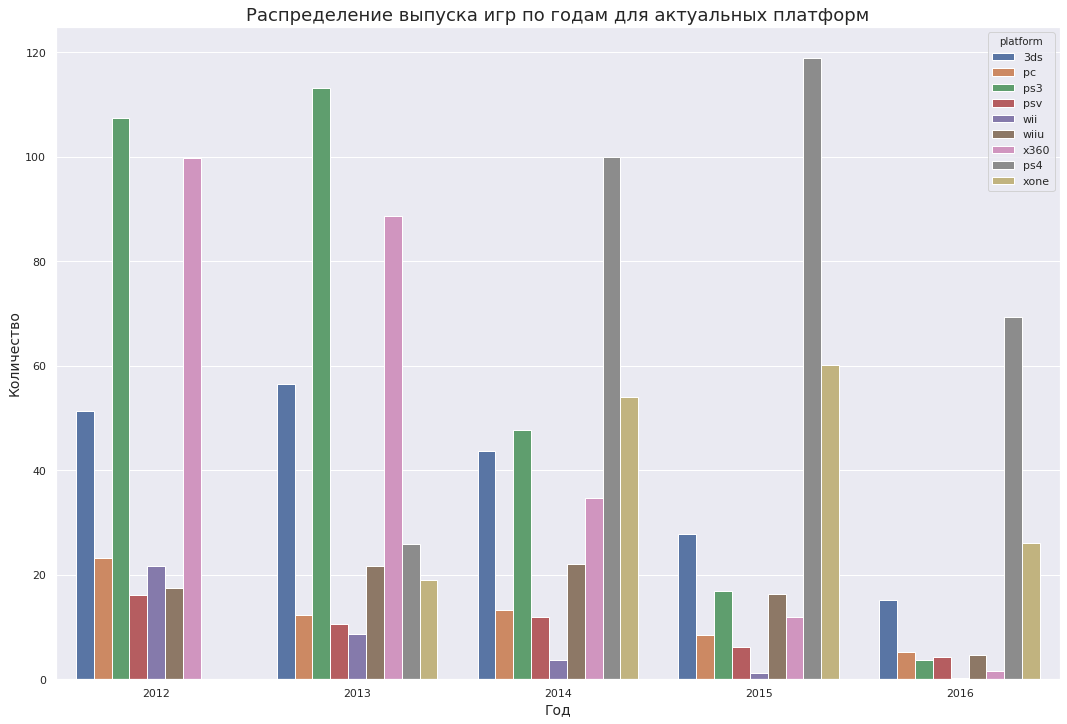

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,12))
sns.barplot(data=actual.pivot, x=actual.pivot.index.get_level_values(0), y="all_sales", hue=actual.pivot.index.get_level_values(1))
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Распределение выпуска игр по годам для актуальных платформ', fontsize=18)
plt.show()

Исходя из таблицы и визуализации, можно сделать следующие выводы:
* Рынок портативных платформ, таких как psv,wii,wiiu,3ds, ждет дальнейший спад, их объем был невысок и в 2012 году, за исключением 3ds, в 2016 ситуация идет к отказу от разработки новых игр и соответственно их реализации, это можно объяснить тем, что мобильные телефоны смещают портативные платформы.
* Преемственность поколений между playstation явно наблюдается, если 2012 и 2013 год имели для ps3 пиковые значения, то с 2014 года ситуация меняется, в связи с выходом платформы следующего поколения, ps4.
* Преемственность поколений наблюдается и для платформ от Microsoft , 2014 год и следующие , явно, десонстриуют смещение акцента производителей игр и покупателей от x360 к приставке следующего поколения xone.
* 2016 год может быть неполным, но если исходить из данных на данный момент, то все платформы идут к падению.
* Рынок игр для pc более стабильный.
* Платформы xone и ps4 наиболее перспективные и высокодоходные.

#### 3.3.2 Глобальные продажи для актуальных платформ

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период.

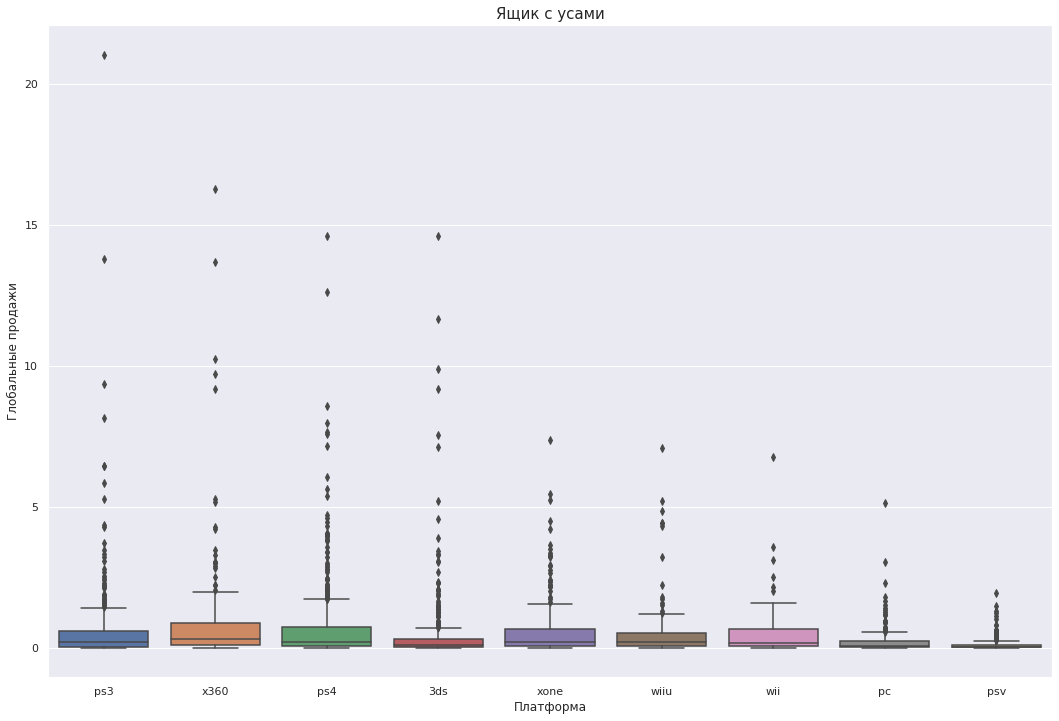

In [46]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(data=actual, x='platform', y='all_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

Создадим также сопутствующую информационную таблицу.

In [47]:
actual.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,396.00,0.49,1.39,0.01,0.04,0.11,0.31,14.60
pc,250.00,0.25,0.49,0.01,0.03,0.08,0.24,5.14
ps3,493.00,0.59,1.46,0.01,0.05,0.20,0.61,21.05
ps4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
psv,411.00,0.12,0.20,0.01,0.02,0.05,0.12,1.96
wii,54.00,0.65,1.17,0.01,0.06,0.18,0.69,6.76
wiiu,147.00,0.56,1.06,0.01,0.08,0.22,0.53,7.09
x360,292.00,0.81,1.71,0.01,0.10,0.31,0.87,16.27
xone,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39


Также поближе внимательнее рассмотрим нормальные значения боксплотов.

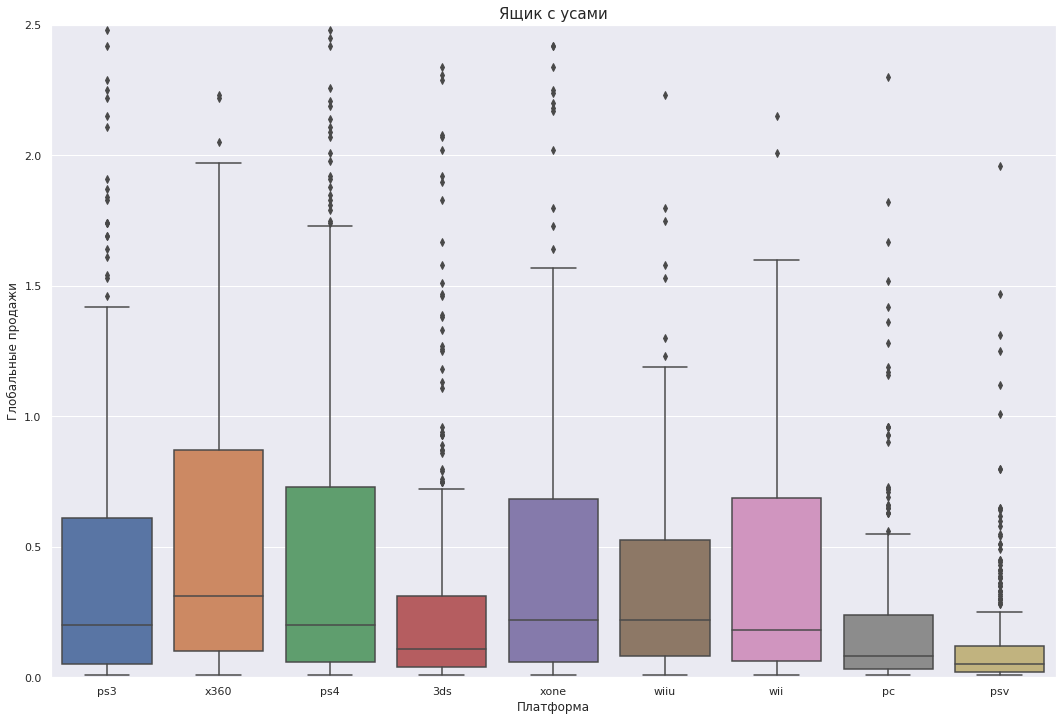

In [48]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(data=actual, x='platform', y='all_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylim(0, 2.5)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

Из проделанной работы можно сделать выводы:
* Самая продаваемая игра вышла для ps3, при этом и количество выпускаемых игр, за рассматриваемый период в ней также больше всех.
* Аутсайдером является портативная система psv, при количество реализуемых игр в 411 штуку, имеет максимальную продажу 1.96 миллинов проданных копий.
* Платформа от Sony ps3 имеет в полтора раза больше продаваемых копий, среди хитовых игр, по сравнению с платформой нового поколения ps4.
* Платформа от Microsoft x360 имеет более чем в 2 раза больше продаваемых копий, среди хитовых игр, по сравнению с платформой нового поколения xone.
* Среди портативных игровых систем можно выделить 3ds, которая имеет хорошие продажи, но как ранее было отмечено, платформа уходит с рынка. 
* Перспективные платформы, которые выявили раньше - ps4 и xone, имеют все шансы на выпуск хитовых игр.

#### 3.3.3 Влияние оценок критиков и пользователей.

Обратим внимание на влияние оценок критиков и пользователей на продажи. Наиболее актуальные платформы у нас две, это ps4 и xone. Но оставляя одну выберем все же ps4, так как по количеству проданных копий, она, все же, опережает xone.

Первоначально создадим функцию для определения коээфициента корреляции и построение диаграммы рассеяния:

In [49]:
def scores_corr(platform_corr):
    print('Платформа '+str(platform_corr)+':')
    df = actual.query('(platform == @platform_corr) & (user_score != -1) and (critic_score != -1)')
    for column in ['user_score', 'critic_score']:
        print('Коэффициент корреляции для', column, '{:.2f}'.format(df[column].corr(df['all_sales'])))
        sns.relplot(x=column, y='all_sales', data=df, color = 'g')
        plt.ylabel('Продажи')
        if column == 'user_score':
            plt.xlabel('Оценка пользователей')
            plt.title('Диаграмма рассеяния оценок пользователей\n'+str(platform_corr))
        if column == 'critic_score':
            plt.xlabel('Оценка критиков')
            plt.title(('Диаграмма рассеяния оценок критиков\n'+str(platform_corr)))
print('')

Проиллюстрируем функцию для ps4.

Платформа ps4:
Коэффициент корреляции для user_score -0.03
Коэффициент корреляции для critic_score 0.41


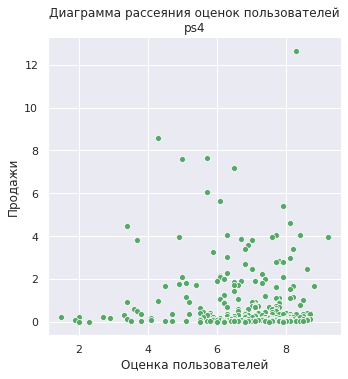

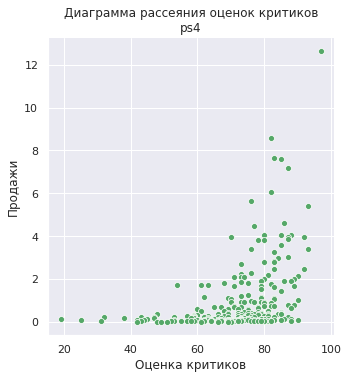

In [50]:
scores_corr('ps4')

Также проанализируем и другие платформы, для сравнения.

Исходя из диаграммы рассеяния можно сделать вывод:
* Между оценками пользователей и продажой игр нет зависимости. 
* Между оценками критиков и продажой игр есть зависимость, но не сильная.

Платформа 3ds:
Коэффициент корреляции для user_score 0.20
Коэффициент корреляции для critic_score 0.31


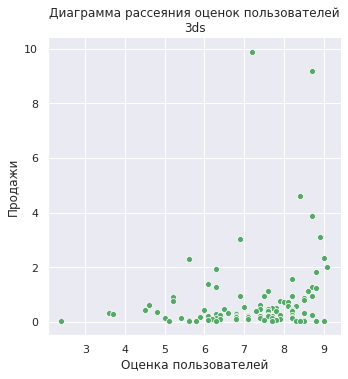

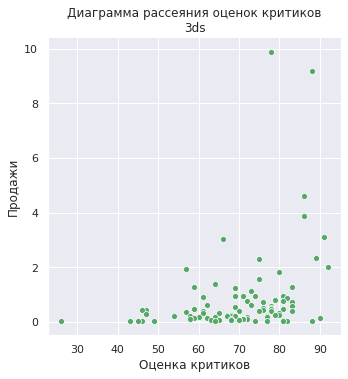

In [51]:
scores_corr('3ds')

Исходя из диаграммы рассеяния можно сделать вывод:

* Между оценками пользователей и продажой игр есть зависимость, но не сильная..
* Между оценками критиков и продажой игр есть зависимость, но не сильная.

Платформа pc:
Коэффициент корреляции для user_score -0.14
Коэффициент корреляции для critic_score 0.24


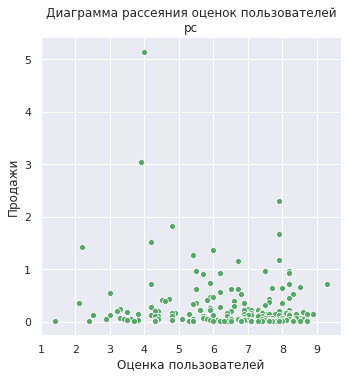

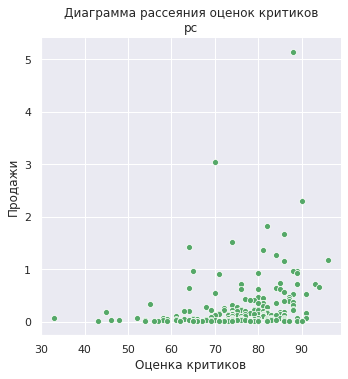

In [52]:
scores_corr('pc')

Исходя из диаграммы рассеяния можно сделать вывод:

* Между оценками пользователей и продажой игр нет зависимости.
* Между оценками критиков и продажой игр есть зависимость, но не сильная.

Платформа ps3:
Коэффициент корреляции для user_score 0.00
Коэффициент корреляции для critic_score 0.33


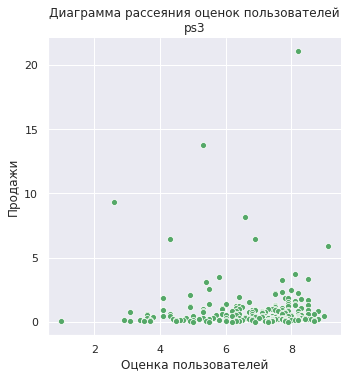

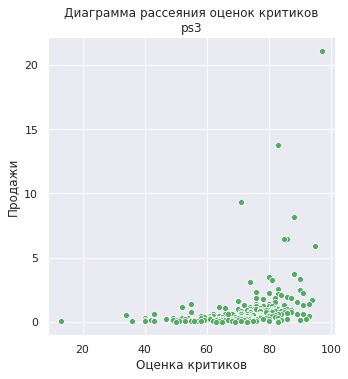

In [53]:
scores_corr('ps3')

Исходя из диаграммы рассеяния можно сделать вывод:

* Между оценками пользователей и продажой игр нет зависимости.
* Между оценками критиков и продажой игр есть зависимость, но не сильная.

Платформа psv:
Коэффициент корреляции для user_score 0.01
Коэффициент корреляции для critic_score 0.09


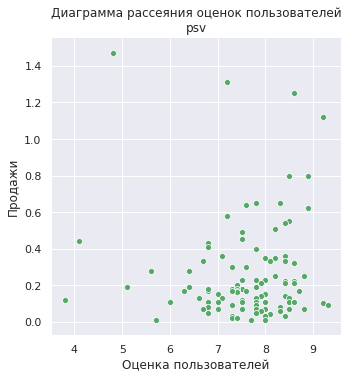

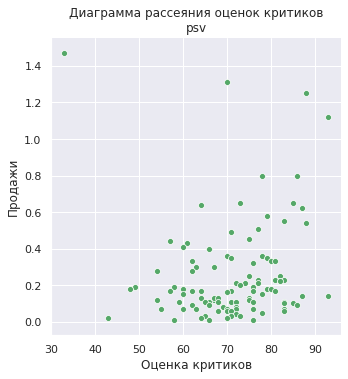

In [54]:
scores_corr('psv')

Исходя из диаграммы рассеяния можно сделать вывод:

* Между оценками пользователей и продажой игр нет зависимости.
* Между оценками критиков и продажой игр есть зависимость, но не сильная.

Платформа wii:
Коэффициент корреляции для user_score 0.01
Коэффициент корреляции для critic_score -0.42


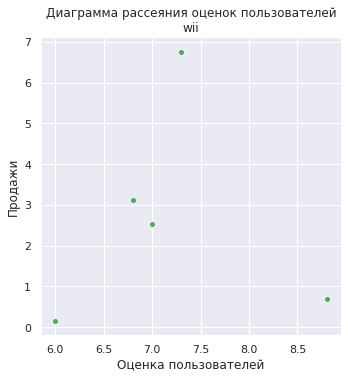

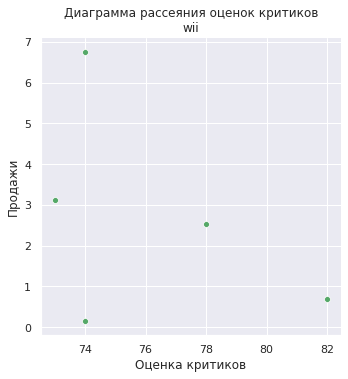

In [55]:
scores_corr('wii')

Исходя из диаграммы рассеяния можно сделать вывод:

* Между оценками пользователей и продажой игр нет зависимости.
* Между оценками критиков и продажой игр нет зависимости.

Платформа wiiu:
Коэффициент корреляции для user_score 0.39
Коэффициент корреляции для critic_score 0.35


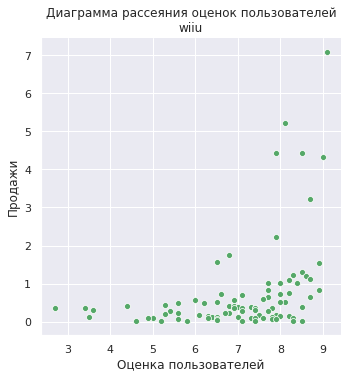

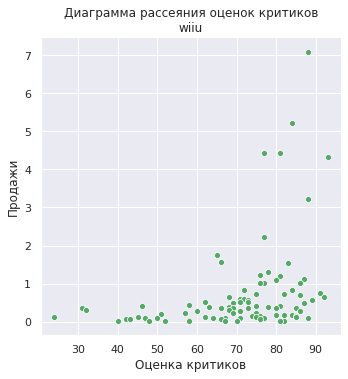

In [56]:
scores_corr('wiiu')

Исходя из диаграммы рассеяния можно сделать вывод:

* Между оценками пользователей и продажой игр есть зависимость,но не сильная.
* Между оценками критиков и продажой игр есть зависимость,но не сильная.

Платформа x360:
Коэффициент корреляции для user_score -0.00
Коэффициент корреляции для critic_score 0.36


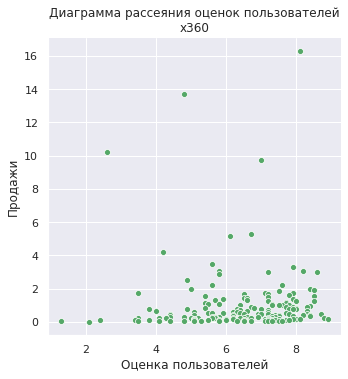

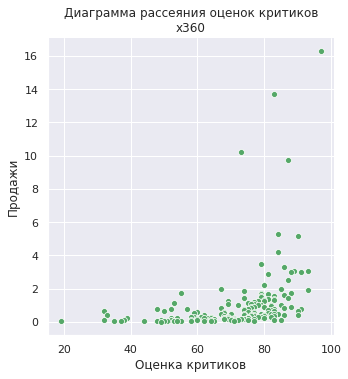

In [57]:
scores_corr('x360')

Исходя из диаграммы рассеяния можно сделать вывод:

* Между оценками пользователей и продажой игр нет зависимости.
* Между оценками критиков и продажой игр есть зависимость, но не сильная.

Платформа xone:
Коэффициент корреляции для user_score -0.09
Коэффициент корреляции для critic_score 0.41


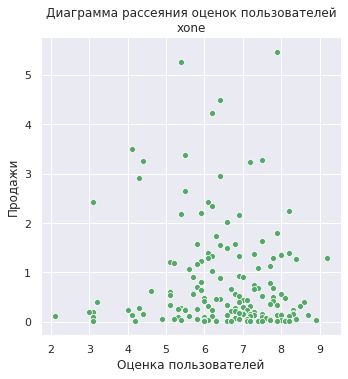

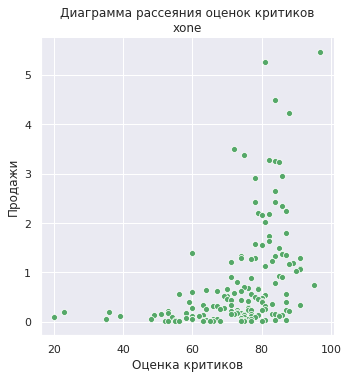

In [58]:
scores_corr('xone')

Исходя из диаграммы рассеяния можно сделать вывод:

* Между оценками пользователей и продажой игр нет зависимости.
* Между оценками критиков и продажой игр есть зависимость, но не сильная.

Исходя из данного исследования, можно сделать следующие выводы:
* Оценка пользоваталей для продажи важна лишь для таких платформ как 3ds и wiiu, это можно объяснить широкой фанбазой и обсуждениям на форумах.
* Оценка важна для всех платформ, кроме wii, это связано с тем, что платформа себя изжила и реанимировать продажи уже нет возможнсти, да и вышло следующее поколение платформы - wiiu.
* ps4 и xone хоть и не имеют тесной связи корреляции, но все же чувствительны больше других платформ к мнению критиков.

#### 3.3.4 Общее расспределение игр по жанрам

Для начала создадим сводную таблицу и посмотрим, количество игр по жанрам и реализацию проданных копий всего за весь актуальный период.

In [59]:
genres = actual.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'sum')

Познакомимся с таблицей в порядке уменьшения.

In [60]:
genres.sort_values('all_sales', ascending =False)

,all_sales
genre,
action,435.54
shooter,304.73
role-playing,180.91
sports,179.55
misc,84.15
platform,60.31
racing,53.50
fighting,44.13
simulation,34.85


Посмотрим также визуально на графике.

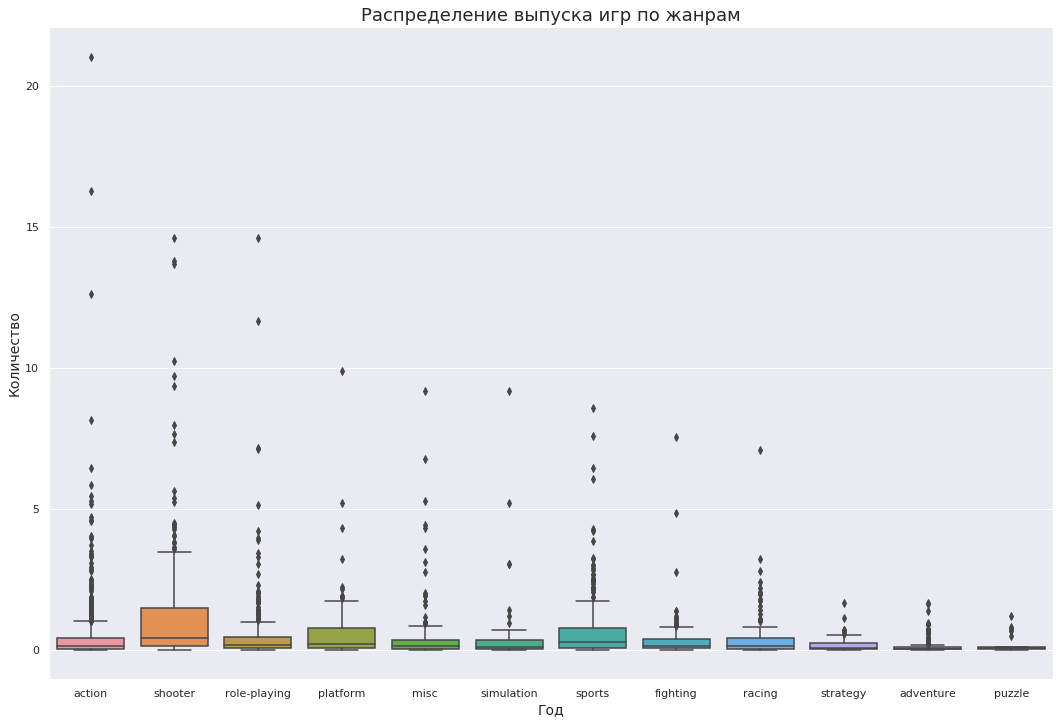

In [61]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,12))
sns.boxplot(data=actual, x='genre', y="all_sales")
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Распределение выпуска игр по жанрам', fontsize=18)
plt.show()

Также более подробно изучим диаграмму в увеличенном масштабе.

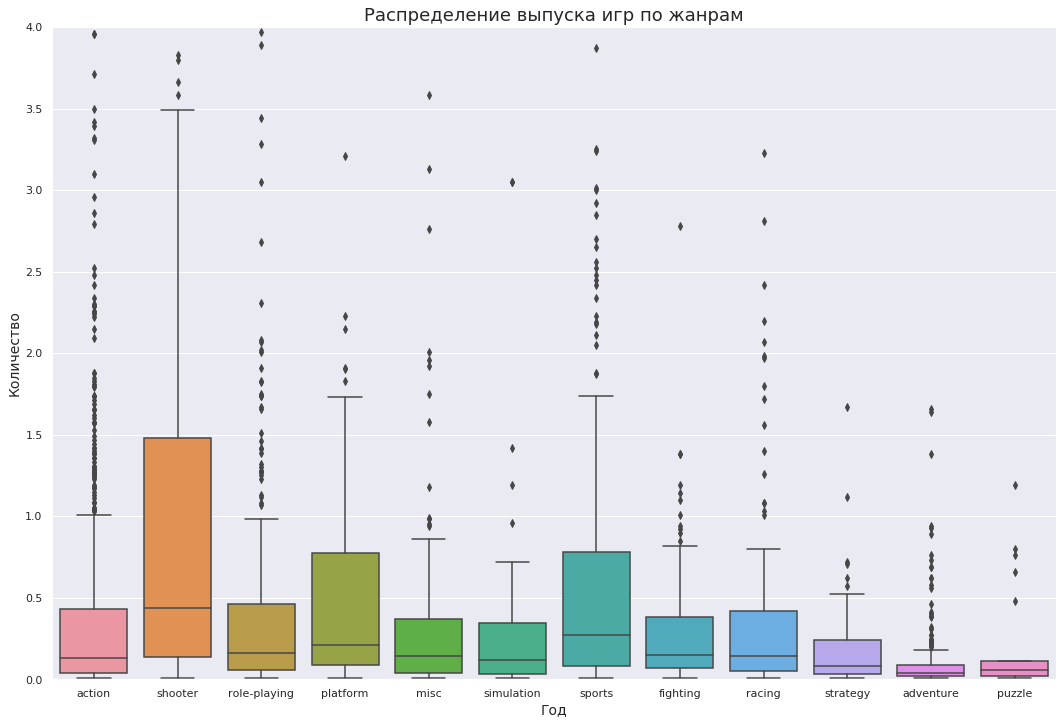

In [62]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,12))
sns.boxplot(data=actual, x='genre', y="all_sales")
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.ylim(0, 4)
plt.title('Распределение выпуска игр по жанрам', fontsize=18)
plt.show()

Более внимательно познакомившись с таблицей и диаграммой, можно сделать следующие выводы:
* Тройка лидеров action c 435.5 млн проданных копий, shooter с 304.7 млн проданных копий и role-playing	с 180.9 млн проданных копий.
* Тройка аутсайдеров adventure с 27.7 млн проданных копий, strategy с 12.6 млн проданных копий и puzzle 4.8, который существенно отличается от отсальных.
* Лидером по среднему и медианому значения является shooter.
* Аутсайдером по среднему и меданому значению является adventure.
* action, shooter,role-playing это жанры, которые ценят за активность, сюжет, где можно сыграть на скорую руку, больше как развлечение для расслабления, которые также можно сыграть и в хорошей компании. 
* strategy, adventure, puzzle это жанры, больше на усидчивость, для них нужно больше времени, больше концентрации и усилий для прохождения.

#### 3.3.5  Вывод

Проведя иследовательский анализ, мы познакомились с историей развития компьютерных игр, с 1980 года по 2016 год. Проведя исследовательский анализ и на основе полученных данных можно сделать следущие заметки, которые помогут при разработке и последующей реализации новых компьютерных игр на следующие годы:
* Рынок портативных игровых платформ приходит к концу, их место замещают мощные смартфоны и планшеты, которые более функциональны, на которых выпускают интересные мобильные игры и на которых при желании можно воспользоваться даже эмуляторами и поиграть в те же самые игры от портативных игровых платформ.
* Между крупными игроками платформ, такими как Sony, Microsoft встречается преемственность. При заходе на рынок нового поколения, всегда предыдущее поколение идет в упадок. 
* Рынок игр для pc стабильный и предсказуемый, но имеет свои нюансы, один из факторов сильно снижающих продажи для этой платформы это пиратство.
* Платформы xone и ps4 наиболее перспективные и высокодоходные в 2016 году и имеют все шансы "встряхнуть" рынок.
* ps4 и xone хоть и не имеют тесной связи корреляции, но все же чувствительны больше других платформ к мнению критиков.
* Тройка лидеров по жанрам: action c 435.5 млн проданных копий, shooter с 304.7 млн проданных копий и role-playing с 180.9 млн проданных копий.
* Тройка аутсайдеров по жанрам: adventure с 27.7 млн проданных копий, strategy с 12.6 млн проданных копий и puzzle 4.8, который существенно отличается от отсальных.
* Лидером по среднему и медианому значения является жанр shooter.
* action, shooter,role-playing это жанры, которые ценят за активность, сюжет, где можно сыграть на скорую руку, больше как развлечение для расслабления, которые также можно сыграть и в хорошей компании.
* strategy, adventure, puzzle это жанры, больше на усидчивость, для них нужно больше времени, больше концентрации и усилий для прохождения.

## Этап 4. Портрет пользователя каждого региона

### 4.1 Топ-5 самых популярных платформ для каждого региона

Нам требуется выявить топ-5 самых популярных платформ в Северной Америке, Европе, Америке:

#### 4.1.1 Топ-5 самых популярных платформ для Северной Америки

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [63]:
na_top_platforms = actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by ='na_sales',ascending = False).head(5)

Посмотрим на таблицу.

In [64]:
na_top_platforms

,na_sales
platform,
x360,140.05
ps4,108.74
ps3,103.38
xone,93.12
3ds,55.31


Создадим круговую диаграмму выраженную в процентах для каждой платформы.

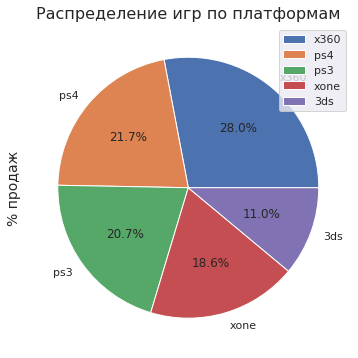

In [65]:
sns.set(style="darkgrid")
na_top_platforms.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по платформам', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Самая популярная платформа в актуальном периоде была x360, и это неудивительно, так как сама приставка от Microsoft имеет штаб-квартиру В Вашингтоне Сша и для рынка Северной Америки существуют привелегии. Продажи составили 140 млн копий.
* Почетное второе у ps4, удивительно, но в данном регионе количество проданных копий обощло ps3, у который жизненный цикл гораздо больше, разница соствляет 1%, между 21.7% и 20.7%.
* Следующее поколение игровой консоли после x360 от Microsoft, xone имеет все шансы укрепиться на рынке. Ее доля составляет 18.6 % от топ-5 платформ.
* Хороший результат также показывается портитивная платформа от Nintendo 3ds с 11% долей.

#### 4.1.2 Топ-5 самых популярных платформ для Европы

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [66]:
eu_top_platforms = actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by ='eu_sales',ascending = False).head(5)

Посмотрим на таблицу.

In [67]:
eu_top_platforms

,eu_sales
platform,
ps4,141.09
ps3,106.86
x360,74.52
xone,51.59
3ds,42.64


Создадим круговую диаграмму выраженную в процентах для каждой платформы.

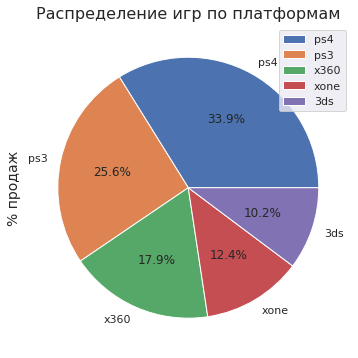

In [68]:
sns.set(style="darkgrid")
eu_top_platforms.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по платформам', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Самая популярная платформа в актуальном периоде является ps4 от компании Sony. Ее доля составляет 1/3 от всех топ-5 платформ. 
* Почетное второе у ps3, ее доля составляет 1/4 рынка.
* Консоли от Microsoft также вошли в топ-5, доля x360 составляет 17.9%, в то время как xone лишь 12.4. Странно, особенно учитывая, что новая консоль от Sony занимает лидирующее место. 
* Хороший результат также показывается портитивная платформа от Nintendo 3ds с 10.2% долей.

#### 4.1.3 Топ-5 самых популярных платформ для Японии

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [69]:
jp_top_platforms = actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by ='jp_sales',ascending = False).head(5)

Посмотрим на таблицу.

In [70]:
jp_top_platforms

,jp_sales
platform,
3ds,87.79
ps3,35.29
psv,21.04
ps4,15.96
wiiu,13.01


Создадим круговую диаграмму выраженную в процентах для каждой платформы.

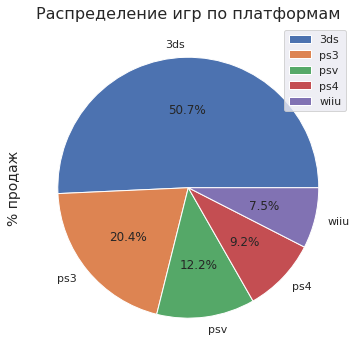

In [71]:
sns.set(style="darkgrid")
jp_top_platforms.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по платформам', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Самая популярная платформа в актуальном периоде портитивная платформа от Nintendo 3ds , ее продажи составляют более половины продаж среди топ-5.
* Почетное второе у ps3, ее доля составила 20.4% пункт, в то время как новое поколение консоли лишь 9.2%
* Третье место занимает psv, портитивная игровая консоль с долей 12.2%.
* Замыкает топ-5 wiiu портативная консоль с долей 7.5%.
* В Японии популярны поративные игровые системы
* Весь топ-5 состоит из игровых платформ Японских компаний.

#### 4.1.4 Вывод

Проведя данное исследование, можно с уверенностью сказать:
* Игровые платформы для каждого из рынков имеют свои особенности.
* В Северной Америке лидирует x360
* В Европе лидирует ps4
* В Японии лидирует 3ds
* В Европе доля ps3 и ps4 около 60% в совокупной доле.
* В Японии пользуются спросом портативные игровые приставки
* ps3 и ps4 пользуется большим спросом в каждом регионе.
* В Японии весь топ-5 составляют платформы от отечественного производителя.

### 4.2 Топ-5 самых популярных жанров для каждого региона

Нам требуется выявить топ-5 самых популярных жанров в Северной Америке, Европе, Америке:

#### 4.2.1 Топ-5 самых популярных жанров для Северной Америки

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [72]:
na_top_genres = actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by ='na_sales',ascending = False).head(5)

Посмотрим на таблицу.

In [73]:
na_top_genres

,na_sales
genre,
action,177.00
shooter,144.77
sports,81.38
role-playing,60.65
misc,38.13


Создадим круговую диаграмму выраженную в процентах для каждого жанра.

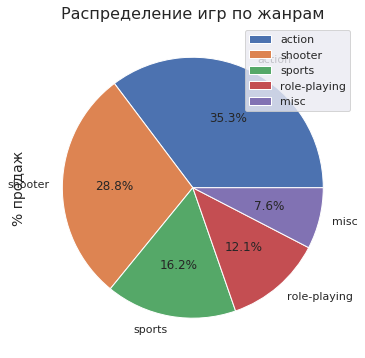

In [74]:
sns.set(style="darkgrid")
na_top_genres.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по жанрам', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Самый популярный жанр action, его доля составляет 35.3% от всего топ-5
* Почетное второе место занимает shooter с его 28.8%.
* Третье место sprots с 16.2
* Замыкают пятерку role-playing с 12.1% и misc с 7.6%

#### 4.2.2 Топ-5 самых популярных жанров для Европы

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [75]:
eu_top_genres = actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by ='eu_sales',ascending = False).head(5)

Посмотрим на таблицу.

In [76]:
eu_top_genres 

,eu_sales
genre,
action,158.43
shooter,113.47
sports,68.84
role-playing,46.76
racing,27.29


Создадим круговую диаграмму выраженную в процентах для каждого жанра.

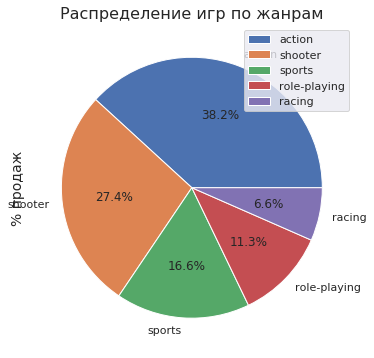

In [77]:
sns.set(style="darkgrid")
eu_top_genres.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по жанрам', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Самый популярный жнр составляет action с долей 38.2% от топ-5
* Почетное второе место у shooter с его 27.4%
* Третье место sports с 16.6%
* Замыкают пятерку role-playing с 11.3% и racing с 6.6%

#### 4.2.3 Топ-5 самых популярных жанров для Японии

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [78]:
jp_top_genres = actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by ='jp_sales',ascending = False).head(5)

Посмотрим на таблицу.

In [79]:
jp_top_genres

,jp_sales
genre,
role-playing,59.12
action,49.18
misc,12.45
simulation,10.35
shooter,9.23


Создадим круговую диаграмму выраженную в процентах для каждого жанра.

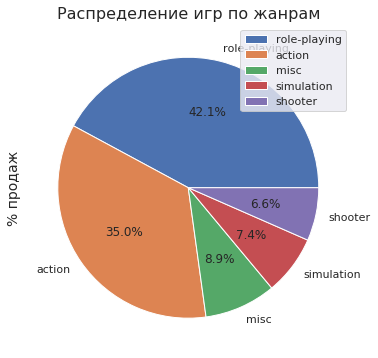

In [80]:
sns.set(style="darkgrid")
jp_top_genres.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по жанрам', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Лидером является role-playing с его 42.1%
* Почетное второе место занимает action
* Третье место у misc
* Замыкает топ-5 simulation с 7.4% и shooter с 6.6%

#### 4.2.4 Вывод

Проведя данное исследование, можно с уверенностью сказать:
* Жанры для каждого из рынков имеют свои особенности.
* Жанр action популярен везде, в Северной Америке и Европе данный жанр занимает первое место, в Японии - второе.
* Жанр shooter входит в топ-5 для всех рынков, для Северной Америки и Европы он занимает второе место, а вот в Японии- пятое.
* Самый популярный жанр в Японии это role-playing
* В Северной Америке и Европе также ценят жанр sports, в Японии он не входит в топ-5
* В Японии пользуются спросом жанр simulation, в то время как в Северной Америки и Европе он не пользуется особым спросом.


### 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе

Нам требуется изучить влияние рейтинга ESRB в Северной Америке, Европе, Америке. 

Вспомним эти категории рейтинга:
* E - от 6 лет.
* M - от 17 лет.
* T - от 13 лет.
* E10+ - от 10 лет.
* K-A - от 6 лет. Теперь данная категория заменена на E
* AO - от 18 лет.
* EC - для детей от 3 лет.
* RP - Рейтинг ожидается.

#### 4.3.1  ESRB для Северной Америки

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [81]:
na_esrp = actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by ='na_sales',ascending = False)

Посмотрим на таблицу.

In [82]:
na_esrp

,na_sales
rating,
m,231.57
e,113.44
unknown,100.13
e10+,75.09
t,66.02


Создадим круговую диаграмму выраженную в процентах для каждого рейтинга.

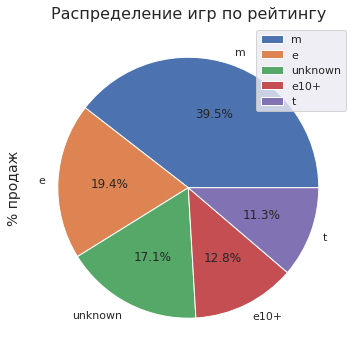

In [83]:
sns.set(style="darkgrid")
na_esrp.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по рейтингу', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Лидером является рейтинг M - от 17 лет, доля 39.5%
* Второе место E - от 6 лет, доля 19.4%
* 17.1 % имеют неопределнный рейтинг
* 12.8%  имеет E10+ - от 10 лет
* 11.3% имеет T - от 13 лет

#### 4.3.2 ESRB для Европы

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [84]:
eu_esrp = actual.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by ='eu_sales',ascending = False)

Посмотрим на таблицу.

In [85]:
eu_esrp

,eu_sales
rating,
m,193.96
e,111.79
unknown,89.32
e10+,54.84
t,52.96


Создадим круговую диаграмму выраженную в процентах для каждого рейтинга.

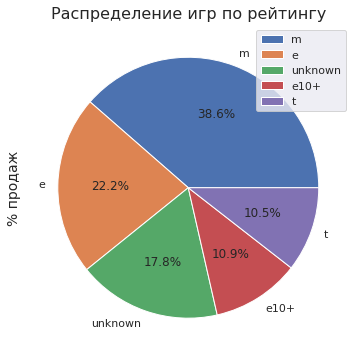

In [86]:
sns.set(style="darkgrid")
eu_esrp.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по рейтингу', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Лидером является рейтинг M - от 17 лет с 38.6%
* Второе место E - от 6 лет с 22.2%
* 17.8 % имеют неопределнный рейтинг
* 10.9%  имеет E10+ - от 10 лет
* 10.5% имеет T - от 13 лет

#### 4.3.3 ESRB для Японии

Создадим сводную таблицу и отсортируем в порядке убывания по количеству проданных копий.

In [87]:
jp_esrp = actual.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by ='jp_sales',ascending = False)

Посмотрим на таблицу.

In [88]:
jp_esrp

,jp_sales
rating,
unknown,95.62
e,27.62
t,25.76
m,21.20
e10+,8.19


Создадим круговую диаграмму выраженную в процентах для каждого рейтинга.

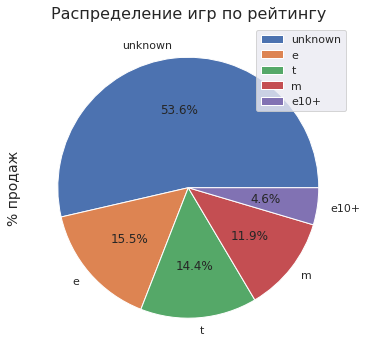

In [89]:
sns.set(style="darkgrid")
jp_esrp.plot.pie(subplots=True, figsize=(11, 6),autopct='%.1f%%')
plt.ylabel('% продаж', fontsize=14)
plt.title('Распределение игр по рейтингу', fontsize=16)
plt.show()

На основе проведенной работы можно сделать вывод:
* Лидером является неопределенный рейтинг с долей 53.6%
* Второе место E - от 6 лет с 15.5%
* Третье место занимает T - от 13 лет с долей 14.4%
* Четвертое место у рейтинга M - от 17 лет с долей 11.9% 
* Замыкает пятерки рейтинг E10+ - от 10 лет с 4.6%

#### 4.3.4 Вывод

Проведя данное исследование, можно с уверенностью сказать:
* Рейтинг M - от 17 лет имеет наибольшую распространенность на рынке Северной Америки и Европы,в то время как в Японии его доля составляет 11.9%.
* Рейтинг E - от 6 лет имеет широкое распространение на каждом рынке и занимает 2 позицию в доле от всех рейтингов.
* Имеется большой % значений для неопределенного рейтинга, его в будущем экспертам предстоит определить.
* Рейтинг T - от 13 , в Северной Америке-11.3%, Европе-10.5%, Японии - 14.4%.
* Интересная ситуация и с распространненостью рейтинга E10+ от 10 лет, в то время как в Северной Америке его доля составляет 12.8%, Европе - 10.9%, в Японии же лишь 4.6%.

### 4.4  Вывод

Проведя данное исследование, был составлен портрет пользователя каждого региона:
* Для рынка Северной Америки это пользователь, который предпочитает такие платформы как x360, ps4, ps3, xone, 3ds больше чем другие платформы. Из жанров он скорее всего выберет action, shooter, sports, role-playing, misc. Также будут преобладать игры с рейтингом M - от 17 лет, E - от 6 лет, E10+ от 10 лет и T от 13 лет.
* Для рынка Европы это пользователь, который предпочитает такие платформы как ps4, ps3, x360, xone, 3ds больше чем другие платформы. Из жанров он скорее всего выберет action, shooter, sports, role-playing, racing. Также будут преобладать игры с рейтингом M - от 17 лет, E - от 6 лет, E10+ от 10 лет и T от 13 лет.
* Для рынка Японии это пользователь, который предпочитает такие платформы как 3ds, ps3, psv, ps4, wiiu больше чем другие платформы. Из жанров он скорее всего выберет role-playing, action, misc, simulation, shooter. Также будут преобладать игры с рейтингом  E - от 6 лет, T от 13 лет, M - от 17 лет, E10+ от 10 лет.

В целом рынки Северной Америки и Европы схожи, у них полностью идентичен рейтинг игр, у них схожие предпочтения в жанрах и платформах в большинстве случаев, а вот рынок Японии очень специфичен в сравнении с ними, сильно отличается рейтинг, жанры, так и уклон в сторону портативных игровых систем.

## Этап 5. Проверка гипотез

Нам необходимо проверить две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Соответсвенно нулевой гипотезой будет являться то, что пользовательские рейтинги платформ xone и pc одинаковые. В то время как альтерантивная, что они различаются.

Для этого нам потребуется 2 выборки , для каждой из платформ:

In [90]:
xone_users_scores = actual.query('(platform == "xone") and (user_score != -1) and (critic_score != -1)')[['user_score']]
pc_users_scores = actual.query('(platform == "pc") and (user_score != -1) and (critic_score != -1)')[['user_score']]

Так как выборки у нас независимые , то воспользуемся критерием Стьюдента используя функцию ttest_ind из библиотеки scipy. Но для начала нужно избавиться от выбросов, так как как они влияют на результат. Сделаем это с вышесозданной функцией whiskers, для определения нормальных значений.

Для платформы xone:

In [91]:
whiskers(xone_users_scores,'user_score')

[3.2499999999999996, 9.2]

In [92]:
whiskers(pc_users_scores,'user_score')

[2.1999999999999997, 9.3]

Зададим уровень альфа:

In [93]:
alpha = 0.05

Создадим переменную с результатом для сравнения:

In [94]:
results_1 = st.ttest_ind(xone_users_scores.query('3.24<=user_score<=9.2'), pc_users_scores.query('2.19<=user_score<=9.3'))

Проверим наши гипотезы.

In [95]:
print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.19369903]
Не получилось отвергнуть нулевую гипотезу


Как можно заметить не получилось отвергнуть гипотезу о том, что средние рейтинги платформ PC и XOne одинаковые.

Для наглядности также убедимся в данных таблицы.

In [96]:
actual.query('((user_score != -1) and (critic_score != -1)) and ((platform == "xone" and 3.24<=user_score<=9.2) | (platform =="pc" and 2.19<=user_score<=9.3))  ').pivot_table(
                                    index='platform', values='user_score')

,user_score
platform,
pc,6.50
xone,6.70


Средние значения для двух платформ близки к друг другу.

**Вывод:** Не получилось отвергнуть нулевую гипотезу, говорящую о том, что пользовательские рейтинги платформ xone и pc одинаковые. Средние пользовательские рейтинги для xone и pc близки по значению.

### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Соответсвенно нулевой гипотезой будет являться то, что пользовательские рейтинги жанров action и sports не отличаются. В то время как альтерантивная, что они отличаются.

Для этого нам потребуется 2 выборки , для каждой из платформ:

In [97]:
action_users_scores = actual.query('(genre == "action") and (user_score != -1) and (critic_score != -1)')[['user_score']]
sports_users_scores = actual.query('(genre == "sports") and (user_score != -1) and (critic_score != -1)')[['user_score']]

Так как выборки у нас независимые , то воспользуемся критерием Стьюдента используя функцию ttest_ind из библиотеки scipy. Но для начала нужно избавиться от выбросов, так как как они влияют на результат. Сделаем это с вышесозданной функцией whiskers, для определения нормальных значений.

Для жанра action:

In [98]:
whiskers(action_users_scores,'user_score')

[4.05, 9.1]

Для жанра sports:

In [99]:
whiskers(sports_users_scores,'user_score')

[2.5499999999999994, 8.7]

Зададим уровень альфа:

In [100]:
alpha = 0.05

Создадим переменную с результатом для сравнения:

In [101]:
results_2 = st.ttest_ind(action_users_scores.query('4.05<=user_score<=9.1'), sports_users_scores.query('2.54<=user_score<=8.7'))

Проверим наши гипотезы.

In [102]:
print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [4.18931098e-23]
Отвергаем нулевую гипотезу


Как можно заметить получилось отвергнуть  нулевую гипотезу о том, что средние рейтинги для жанров action и sports не отличаются.

Для наглядности также убедимся в данных таблицы.

In [103]:
actual.query('((user_score != -1) and (critic_score != -1)) and ((genre== "action" and 4.05<=user_score<=9.1) | (genre =="sports" and 2.54<=user_score<=8.7))  ').pivot_table(
                                    index='genre', values='user_score')

,user_score
genre,
action,7.07
sports,5.91


Средние оценки отличаются более чем на 1 балл.

**Вывод:** Удалось отвергнуть нулевую гипотезу, говорящую о том, что пользовательские рейтинги жанров action и sports не отличаются. Средние пользовательсие оценки для жанров action и sports отличаются.

### 5.3 Вывод

В ходе работы проверили две гипотезы, уровень альфа задали как 5%. Были заданы такие нулевые гипотезы как:

* Пользовательские рейтинги платформ xone и pc одинаковые
* Пользовательские рейтинги жанров action и sports не отличаются

Так как у нас независимые выборки, был выбран критерий Стьюдента, альтернативные гипотезы противоречат нулевым и в ходе работы по гипотезам было выявлено :

* Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги для xone и pc близки по значению.
* Удалось отвергнуть нулевую гипотезу. Средние пользовательсие оценки для жанров action и sports отличаются.

## Этап 6. Общий вывод

Познакомившись подробнее с нашим датасетом было выявлено, что каждая строка включает в себя данные об игре. Всего 16715 строк и 11 столбцов,которые включают:
* name — название игры
* platform — платформа
* year_of_release — год выпуска
* genre — жанр игры
* na_sales — продажи в Северной Америке (миллионы проданных копий)
* eu_sales — продажи в Европе (миллионы проданных копий)
* jp_sales — продажи в Японии (миллионы проданных копий)
* other_sales — продажи в других странах (миллионы проданных копий)
* critic_Score — оценка критиков (максимум 100)
* user_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Был проделан большой пласт работы в предобработке данных:
* Был изменен регистр столбцов на нижний для удобства в дальнейшей работы.
* Был изменен регистр строк на нижний для name, platform, genre, rating для удобства в работе.
* Были удалены пропущеные значения в name, genre, year_of_release, так как таких значений немного и нет возможности их восстановить с большей вероятностью.
* Были заменены пропущенные значения на -1 в critic_score, user_score, для маркировки.
* Значения tbd в user_score заменили на -1, так как эти оценки ожидаются, и было решено промаркировать.
* Объединили значения с "k-a" и "e", в последнюю, по нормам современной тенденции.
* Заменили тип данных в year_of_release на int16, так как представлен лишь год. Также заменили тип данных в user_score на * float64, так как избавились от tbd и теперь в них лишь числа с плавающей запятой.
* Создали общий столбец с суммарными продажами по всем регионам.

Был проведен исследовательский анализ данных и познакомились с историей развития компьютерных технолоий. Было обнаружено:
* Бум комьютерных игр приходится с 1994 года.
* Наибольшее пиковое значение приходится на 2009 и 2010 год
* После 2011 года происходит резкий спад, связанный с увеличением мощностей мобильных телефонов и замещением интересов в развлечении, который ярко виден на графике.
* Жизненный цикл для самых популярных платформ отличается, средний цикл выпуска для топ10 составляет 10,5 лет. В то время как среднее и медианное значение для всех платформ составляет 6 лет.
* Рынок портативных игровых платформ приходит к концу, их место замещают мощные смартфоны и планшеты, которые более функциональны, на которых выпускают интересные мобильные игры и на которых при желании можно воспользоваться даже эмуляторами и поиграть в те же самые игры от портативных игровых платформ.
* Между крупными игроками платформ, такими как Sony, Microsoft встречается преемственность. При заходе на рынок нового поколения, всегда предыдущее поколение идет в упадок.
* Рынок игр для pc стабильный и предсказуемый, но имеет свои нюансы, один из факторов сильно снижающих продажи для этой платформы это пиратство.
* Платформы xone и ps4 наиболее перспективные и высокодоходные в 2016 году и имеют все шансы "встряхнуть" рынок.
* ps4 и xone хоть и не имеют тесной связи корреляции, но все же чувствительны больше других платформ к мнению критиков.
* Тройка лидеров по жанрам: action c 435.5 млн проданных копий, shooter с 304.7 млн проданных копий и role-playing с 180.9 млн проданных копий.
* Тройка аутсайдеров по жанрам: adventure с 27.7 млн проданных копий, strategy с 12.6 млн проданных копий и puzzle 4.8, который существенно отличается от отсальных.
* Лидером по среднему и медианому значения является жанр shooter.

Был составлен портрет для пользователей стран Северной Америки, Европы, Японии, на основе анализа, можно сделать следующие выводы:
* Для рынка Северной Америки это пользователь, который предпочитает такие платформы как x360, ps4, ps3, xone, 3ds больше чем другие платформы. Из жанров он скорее всего выберет action, shooter, sports, role-playing, misc. Также будут преобладать игры с рейтингом M - от 17 лет, E - от 6 лет, E10+ от 10 лет и T от 13 лет.
* Для рынка Европы это пользователь, который предпочитает такие платформы как ps4, ps3, x360, xone, 3ds больше чем другие платформы. Из жанров он скорее всего выберет action, shooter, sports, role-playing, racing. Также будут преобладать игры с рейтингом M - от 17 лет, E - от 6 лет, E10+ от 10 лет и T от 13 лет.
* Для рынка Японии это пользователь, который предпочитает такие платформы как 3ds, ps3, psv, ps4, wiiu больше чем другие платформы. Из жанров он скорее всего выберет role-playing, action, misc, simulation, shooter. Также будут преобладать игры с рейтингом E - от 6 лет, T от 13 лет, M - от 17 лет, E10+ от 10 лет.

В ходе работы мы проверили две гипотезы и на основе анализа сделать следующие выводы:
* Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги для xone и pc близки по значению.
* Удалось отвергнуть нулевую гипотезу. Средние пользовательсие оценки для жанров action и sports отличаются.

Проведя данную работы, можно с увернностью заявить, что рынок очень изменчив. Многие платформы остались в истории, в целом рынок игровых платформ не вернулся к пиковым значениям 2008-2009 года. Это можно объяснить кризисом 2008 года, развитием мобильных игр , а также замещением развлечений с игр на те же соц сети. Но не смотря на это, платформы имеют все шансы сохранить продажи. Для этого мы выявили актульные платформы, жанры , рейтинги ESRB. Каждый рынок очень важен и в то же время имеет свои тонкости. Необходимо прислушиваться к мнению критиков и учитывать потрет пользователя каждого региона.